# Wine Quality Clustering and Predictions

## Project Goals

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* identify features of wine that influence wine quality
</br>

* identify best features to use in order to cluster data points
</br>

* use classification models to predict wine quality
    


# Imports used:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import prepare
import acquire
import model
import explore

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

seed = 42

## Acquire

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* Wine data was obtained from data.world
</br>

* Data was obtained 1/30/2023
</br>

* Dataframe had 6,497 rows by 14 columns before preparing
</br>

* Each row represents a wine and each column is a feature of that wine
    

In [2]:
# function aquires wine data from csv file in repo
df = acquire.get_wine()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Prepare

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* There were no null values in the dataset
</br>

* columns were renamed to include underscore
</br>

* outliers were identified and removed from each column
</br>

* Each row represents a wine and each column is a feature of that wine
    

In [3]:
#This function takes in a dataframe, 
#the threshold and a list of columns 
#and returns the dataframe with outliers removed

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
# cols above are the columns we want to check and remove outliers
df = prepare.remove_outliers(df, 2.5, cols)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


# Exploration:

* How many wines of each quality are there?
* Do fixed acidity and volatile acidity correlate?
* Does residual sugar and wine quality have a correlation?
* Does citric acid and pH correlate?
* Do sulphates vs free and total sulphur dioxides have a relationhip?
* Does density vs quality have a relationship?

In [4]:
#split data
train, validate, test = prepare.subset_df(df)

(3577, 13) (1193, 13) (1193, 13)


In [5]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.120,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white
4180,6.8,0.180,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red
4143,6.9,0.320,0.30,1.8,0.036,28.0,117.0,0.99269,3.24,0.48,11.0,6,white


# How many wines of each type fall into each quality?


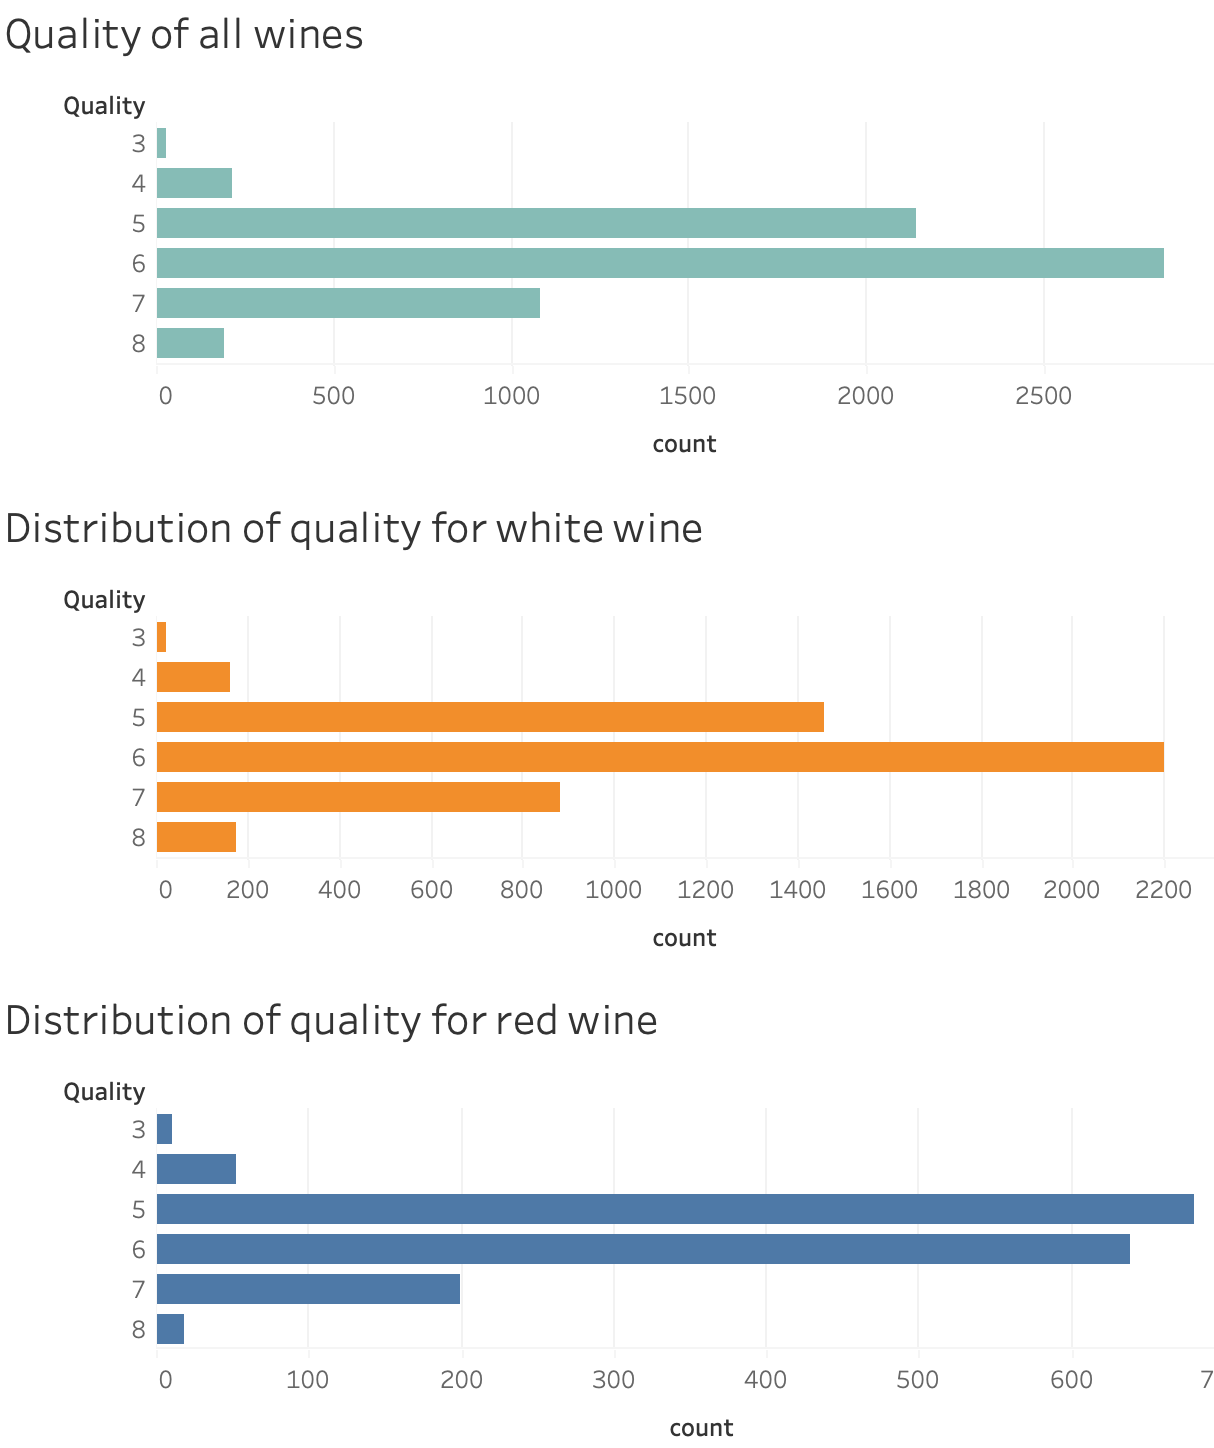

<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* It appears that the distribution of qualities for each type of wine are relatively similar

## Do fixed acidity and volatile acidity correlate?


$H_0$: There is no correlation between fixed acidity and volatile acidity

$H_a$: There is a correlation between fixed acidity and volatile acidity

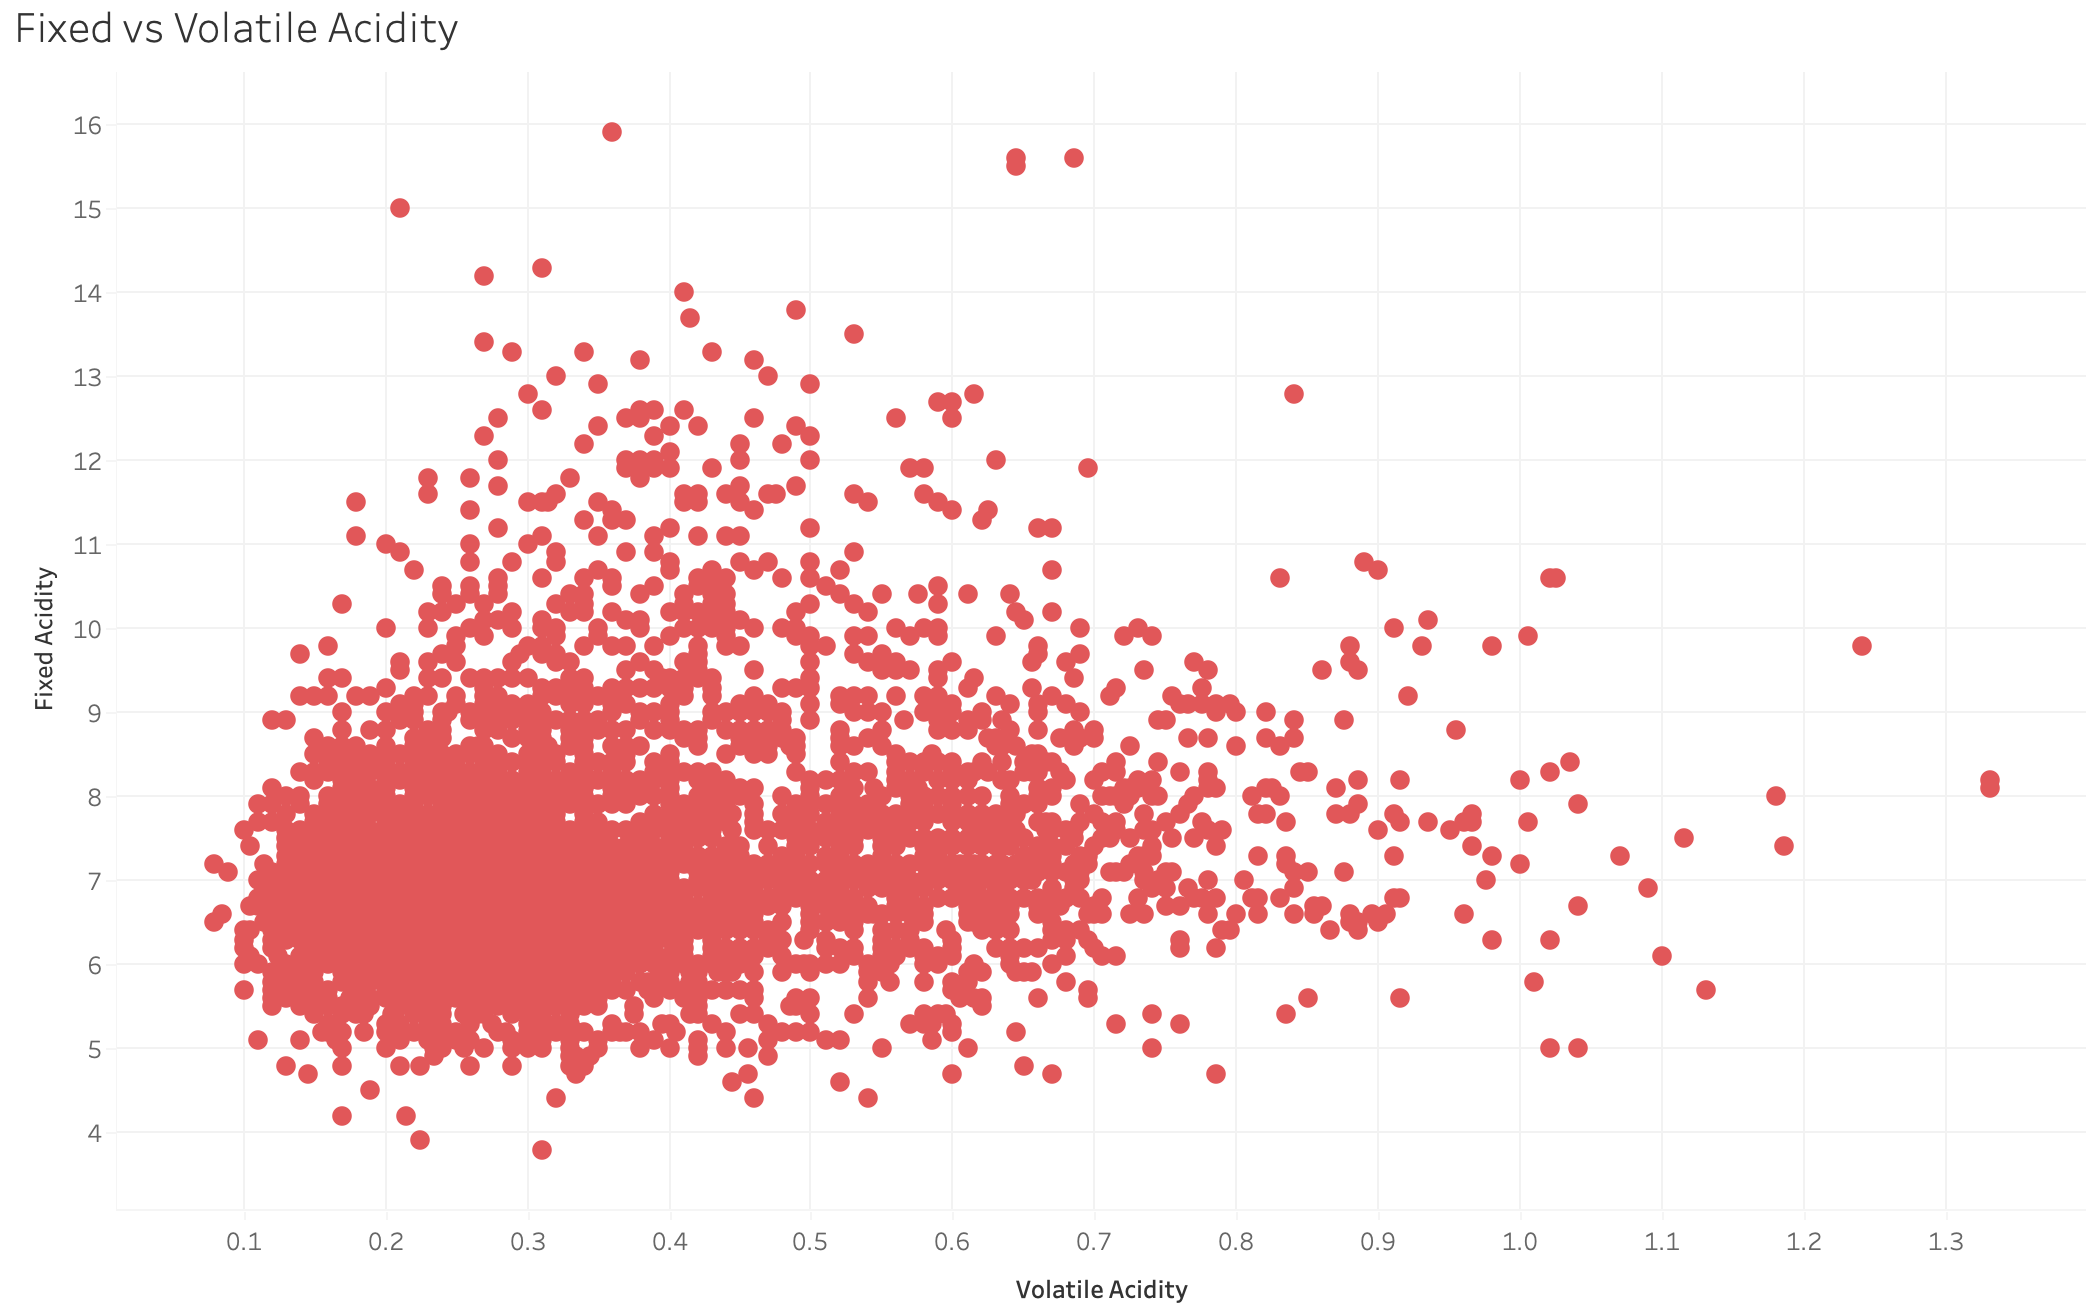

In [6]:
#function to run a pearson r test 
explore.pearsonr_report(train['fixed_acidity'], train['volatile_acidity'])

T-statistic = 0.1968
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr test, there is enough evidence to reject the null hypothesis and conclude that there is a correlation

## Does residual sugar and wine quality have a correlation?

$H_0$: There is no signifigant relationship between residual sugar level and wine quality.

$H_a:$: There is a signifigant relationship between residual sugars and wine quality

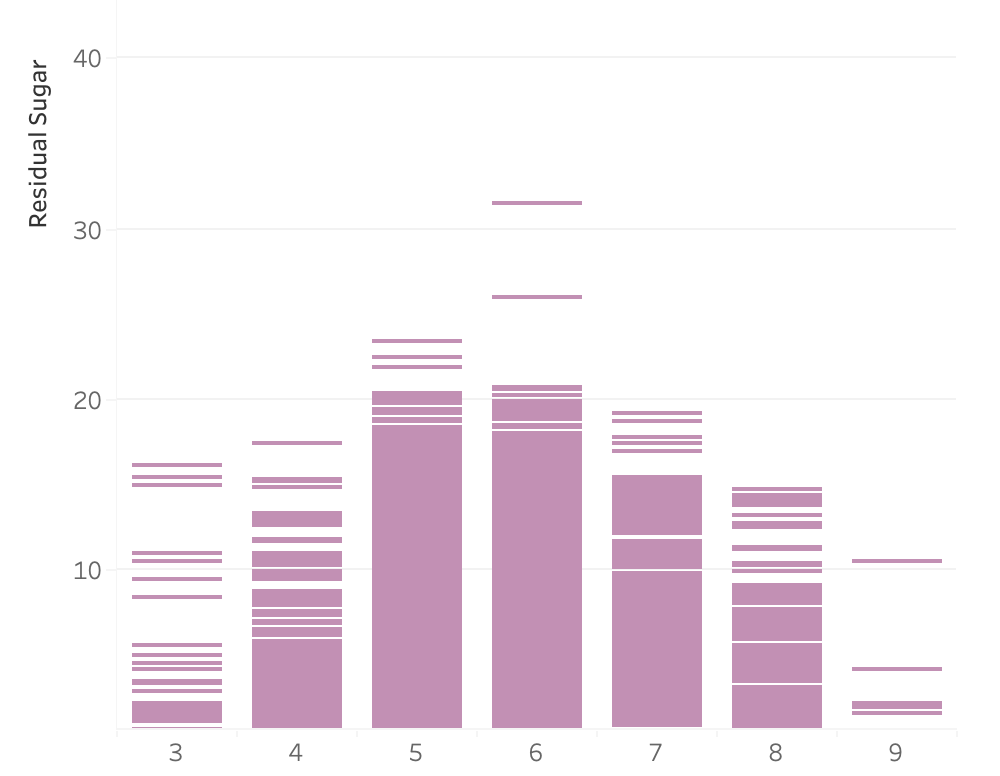

In [7]:
#function to run a mann whitney u test 
explore.mannwhitney_report(train['residual_sugar'], train['quality'])

T-statistic = 4871613.5000
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the nonparametric correlation statistical test, there is a very significant relationship between residual sugar and wine quality

## Does citric acid and pH levels have a correlation?

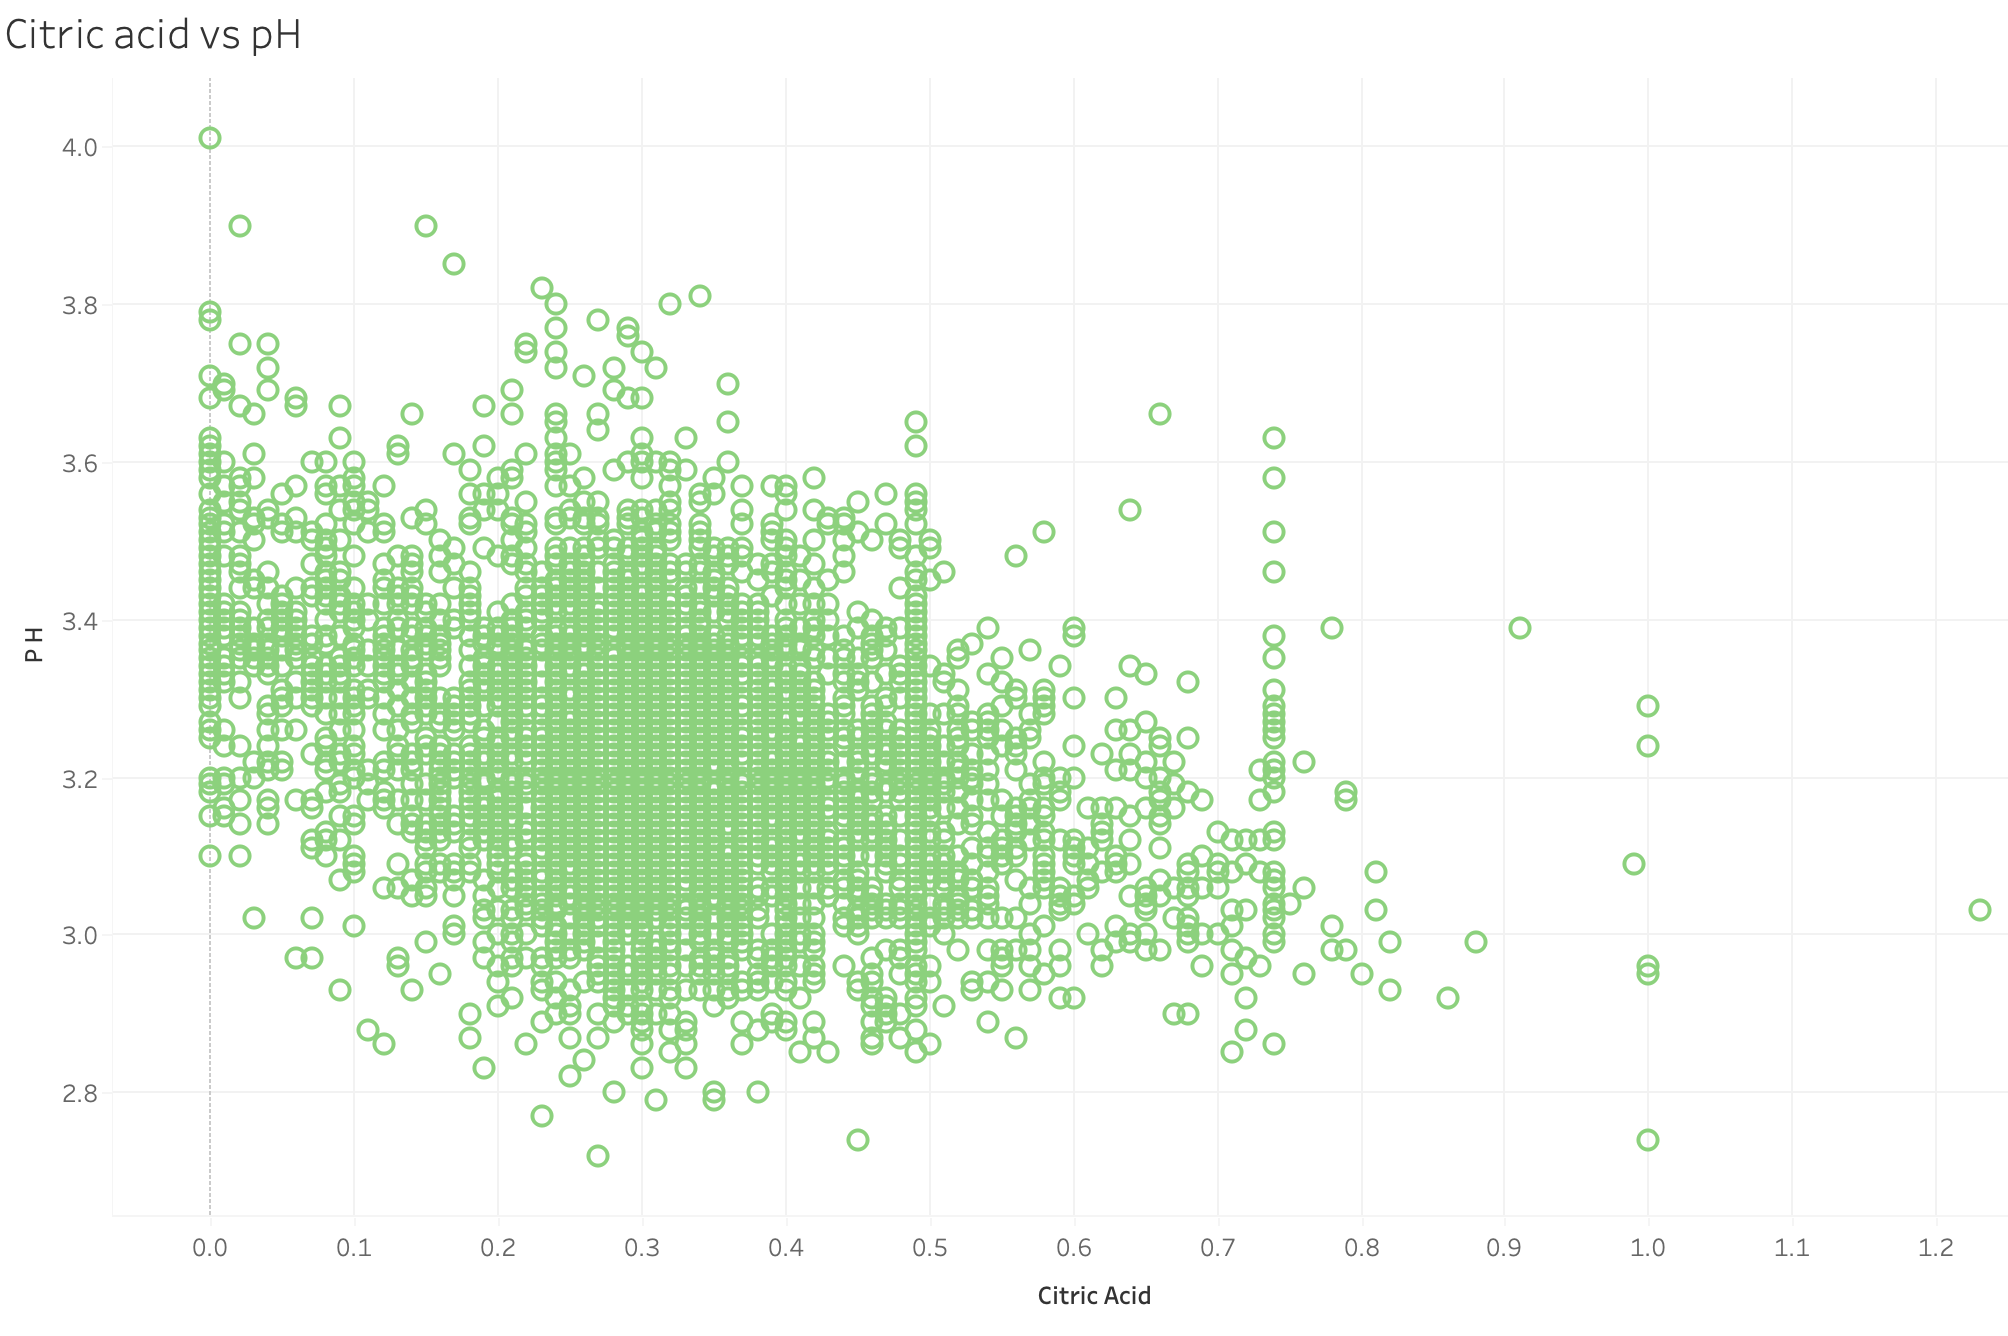

In [8]:
#function to run a pearsonr test 
explore.pearsonr_report(train['citric_acid'], train['pH'])

T-statistic = -0.3026
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr statistical test, there is enough evidence to reject the null hypothesis and conclude that there is a negative correlation between pH and citric acid

## Does free or total sulfur dioxide and sulphates have a relationship?

$H_0$: There is no relationship between free and total sulphur dioxides

$H_a$: There is a relationship between free and total sulphur dioxides

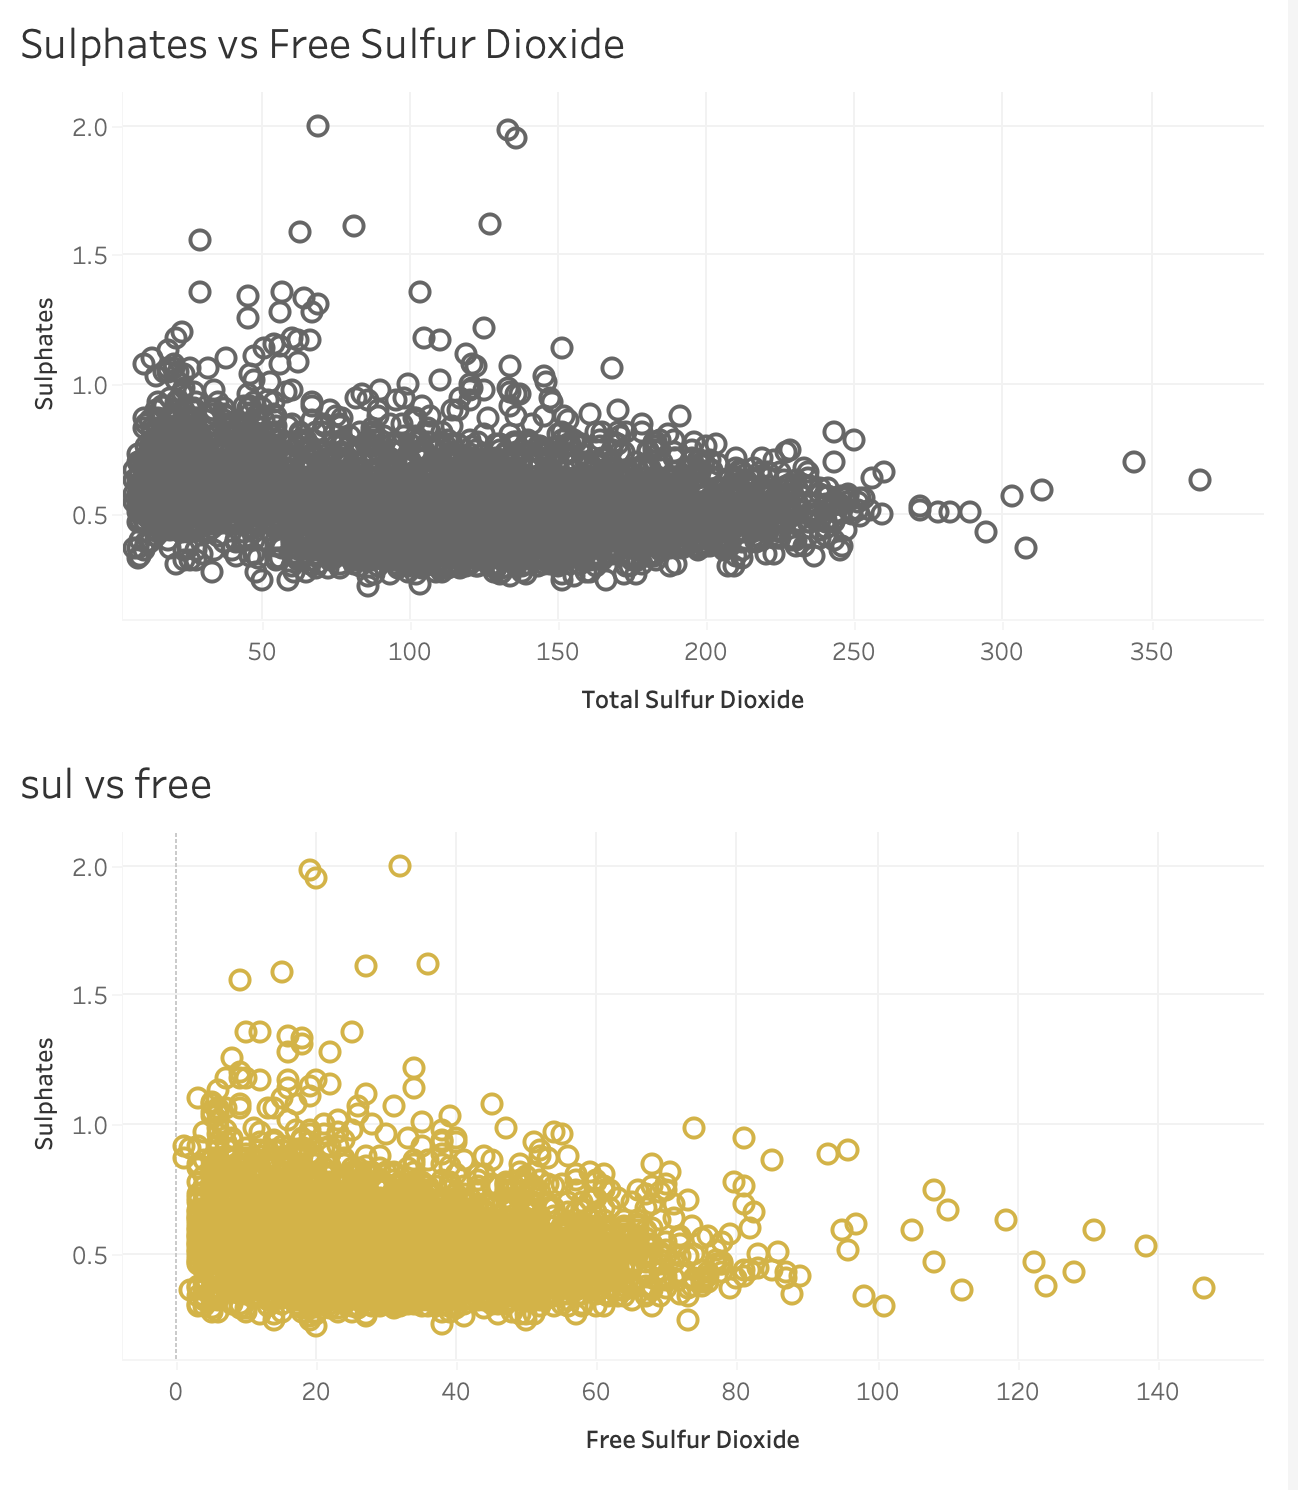

In [9]:
#function to run a pearsonr test with sulphates and total sulphur dioxide
explore.pearsonr_report(train['sulphates'], train['total_sulphur_dioxide'])

T-statistic = -0.2495
p-value     = 0.0000
Is p-value < alpha? True


In [10]:
#function to run a pearsonr test with sulphates and free sulphur dioxide
explore.pearsonr_report(train['sulphates'], train['free_sulphur_dioxide'])

T-statistic = -0.1467
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr test, there is enough evidence to reject the null hypothesis and conclude that there is a negative correlation between sulphates and free sulphur dioxide and sulphates and total sulphur dioxide

## Is there a relationship between density and quality?

$H_0$: There is no relationship between density and quality

$H_a$: There is a relationship between density and quality

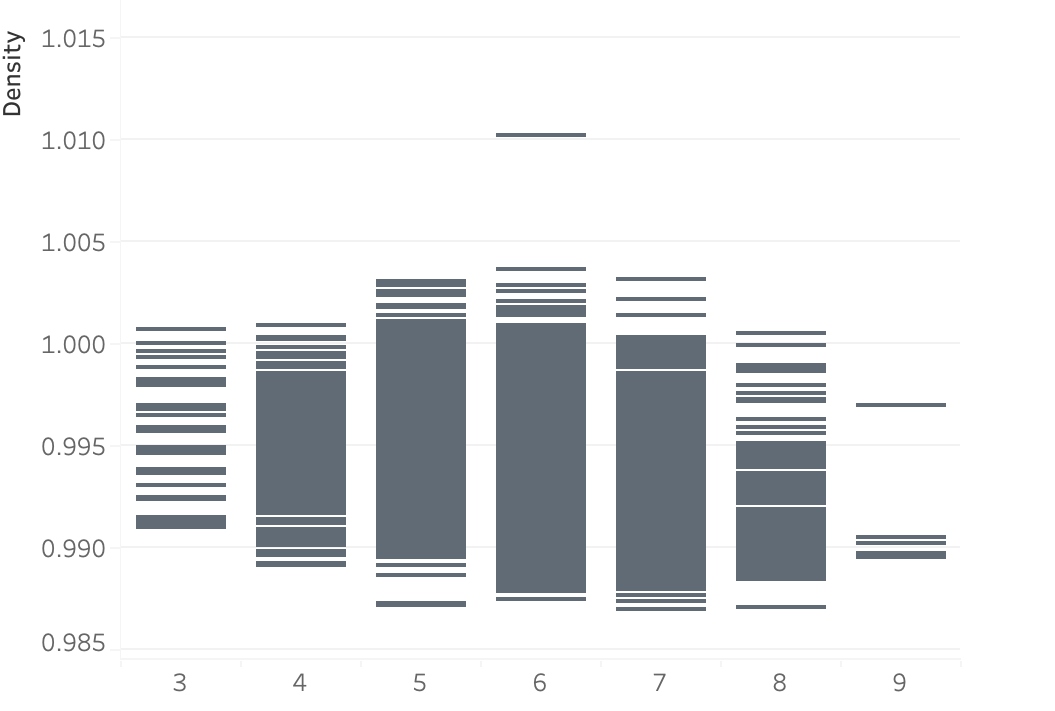

In [11]:
#function to run an independent t-test on the data
explore.ind_ttest_report(train['quality'], train['density'])

T-statistic = 339.4965
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the statistical test, there is a relationship between density and quality.

## Exploration Summary

<div class="alert alert-block alert-success">
    
- Fixed acidity and volatile acidity have a relationship with each other.

- Free sulphur dioxide and total sulphur dioxide have a relatioship with each other, while both of those features are also negatively correlated to the sulphates feature.

- One of the biggest, if not the biggest factors in wine quality, is the residual sugar level.

- citric acid and pH levels have a medium-low negative correlation with each other; meaning that, as the citric acid levels rise, the pH levels lower.

- Density does have a significant relationship with wine quality.

- Fixed and volatile acidity are correlated enough to attempt to cluster them together into a new feature.

- Free and total sulphur dioxides are both highly correlated with each other, and will be clustered together to create a new feature.

# Modeling Part 1 - Clustering

- Before getting to the classification algorithms, we are going to create some clusters to use.

In [12]:
train.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.12,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white


In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.xy_subsets(train, validate, test, 'quality')

In [14]:
#list to scale continuous data
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
        'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 
        'density', 'pH', 'sulphates', 'alcohol']
#function to scale subsets
X_train_scaled, X_validate_scaled, X_test_scaled = prepare.scale_data(X_train, X_validate, X_test, MinMaxScaler(), cols)

In [15]:
X_train_scaled.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type
4890,0.242857,0.054054,0.452055,0.100437,0.321101,0.2,0.225589,0.119432,0.380952,0.09589,0.803571,white


## Cluster 1 - Fixed and Volatile Acidity

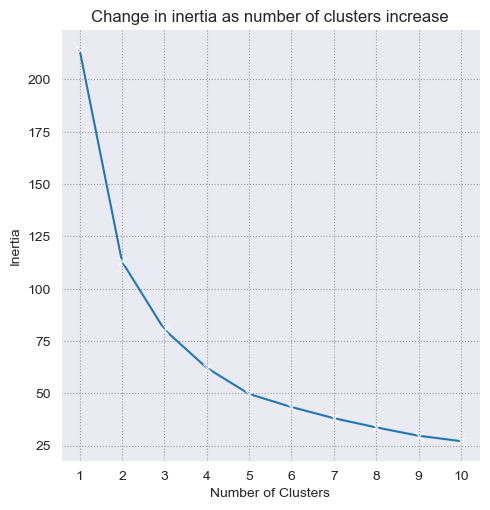

In [16]:
#creating a list to cluster on
cols = ['volatile_acidity', 'fixed_acidity']
#function to create clusters and visualize to choose best number of clusters
model.inertial_dampening(X_train_scaled, cols)

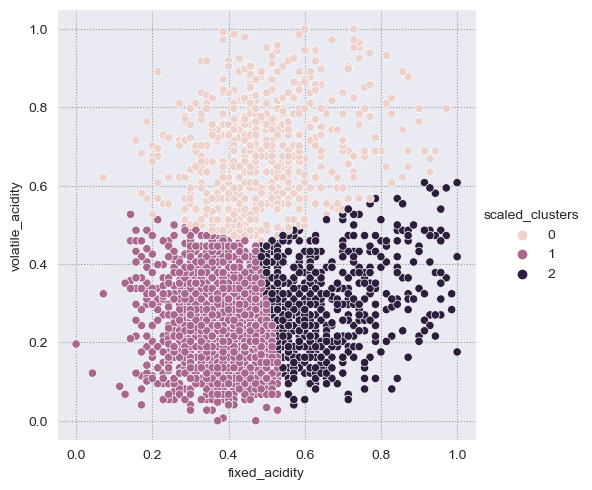

In [17]:
#function to create and visualize clusters
X_train_scaled, kmeans = model.cluster_fit_acidity(X_train_scaled)

In [18]:
#function to create and add the cluster to dataframe
X_validate_scaled = model.cluster_val_test_acidity(X_validate_scaled, kmeans)

In [19]:
#same function as above, used to create and add cluster to dataframe
X_test_scaled = model.cluster_val_test_acidity(X_test_scaled, kmeans)

In [20]:
X_validate_scaled.head(1)

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
5030,0.534247,0.639738,0.348624,0.44,0.511785,0.797289,0.542857,0.712329,0.125,white,1


In [21]:
X_test_scaled.head(0)

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas


## Cluster 2 - Free and Total Sulphur Dioxides

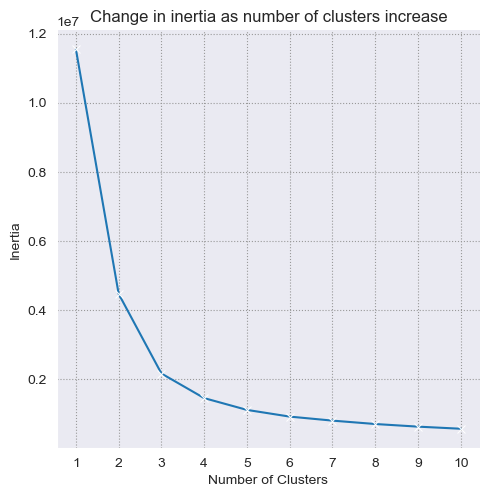

In [22]:
#creating a list to cluster on
cols = ['free_sulphur_dioxide', 'total_sulphur_dioxide']
#function to cluster
model.inertial_dampening(X_train, cols)

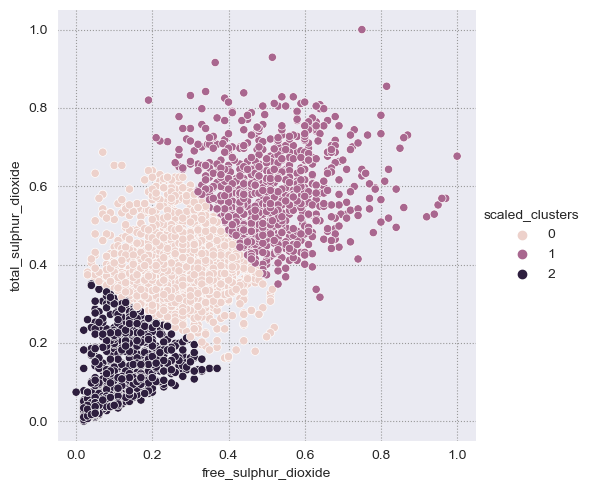

In [23]:
#function to create and visualize clusters
X_train_scaled, kmeans = X_train_scaled, kmeans = model.cluster_fit_sulphurs(X_train_scaled)

In [24]:
#function to cluster data and append to df
X_validate_scaled = model.cluster_val_test_sulphurs(X_validate_scaled, kmeans)

In [25]:
X_validate_scaled.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,dioxide_clusters
5030,0.534247,0.639738,0.348624,0.797289,0.542857,0.712329,0.125000,white,1,1
1421,0.246575,0.043668,0.642202,0.606198,0.542857,0.452055,0.178571,red,2,2
5526,0.424658,0.144105,0.339450,0.249839,0.361905,0.082192,0.553571,white,1,0
1315,0.369863,0.061135,0.678899,0.584248,0.466667,0.452055,0.250000,red,0,2
4702,0.616438,0.074236,0.330275,0.227889,0.371429,0.315068,0.625000,white,1,0


In [26]:
#same function as above, used to cluster the data and append to df
X_test_scaled = model.cluster_val_test_sulphurs(X_test_scaled, kmeans)

In [27]:
X_test_scaled.head(0)

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,dioxide_clusters


Now that we have our clusters, it's time to create and run the classification models.

# Modeling Part 2 - Classification

- The first step here is to get our baseline accuracy, which is our number to beat!

- After a multitude of models, we ended up with our three best being:

    - A Decision tree with a max depth of 4
    
    - A Random forest with math depth of 5
    
    - A Decision tree with a max depth of 4, without using the clusters

In [28]:
#turning out clusters into dummies
X_train_scaled = pd.get_dummies(X_train_scaled, columns=['wine_type', 'acidity_areas', 'dioxide_clusters'], drop_first=True)
X_validate_scaled = pd.get_dummies(X_validate_scaled, columns=['wine_type', 'acidity_areas', 'dioxide_clusters'], drop_first=True)
X_test_scaled = pd.get_dummies(X_test_scaled, columns=['wine_type', 'acidity_areas', 'dioxide_clusters'], drop_first=True)

In [29]:
#function to get baseline
model.make_baseline(train, 'baseline', 'quality')

Baseline Accuracy is: 0.446


## Train and Validate Models

In [30]:
#function to run a random forest model
model.rf_model(X_train_scaled, y_train, X_validate_scaled, y_validate)

Train accuracy is: 0.59
-----

Validate accuracy is: 0.53


In [31]:
#this model runs the model with the created clusters
model.dectree_model(X_train_scaled, y_train, X_validate_scaled, y_validate)

Train accuracy is: 0.55
-----

Validate accuracy is: 0.53


In [32]:
#this function runs the model with no clusters
model.dectree_no_clusters(X_train_scaled, y_train, X_validate_scaled, y_validate)

Train accuracy is: 0.55
-----

Validate accuracy is: 0.53


- Our Decision tree model and our Decision tree model without using clusters had very similar accuracy across the train and validate datasets.

- Random forest may be somewhat overfit. 

- Based on this we would use one of our Decision Tree models on our test dataset.

## Test Model

In [52]:
#code to fit
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=150, random_state=42)
rf = rf.fit(X_train_scaled, y_train)

In [53]:
rf.score(X_test_scaled, y_test)

0.5347862531433362

Based on the results from the test model, we beat our baseline accuracy by 10%! Because of this, we would recommend this model for future use.

# Conclusion

## Summary:

- 

## Recommendations:

## Next Steps:
